In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Analysis of Human brain spatial data

Data Analysis Outline

1.  Load data into Anndata

Preprocessing

2.1. Quality control

2.2. Feature selection

2.3. Normalization 

Feature Reduction and Visualization

3.1. Principal Component Analysis (PCA)

Downstream Analysis

4.1. Clustering

4.2. Visualization of data using UMAP and spatial structure 

4.3. Differential Expression Analysis

4.4. Marker Identification

4.5. Conclusion



In [ ]:
!pip install scanpy
!pip install leidenalg

In [6]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import leidenalg

In [26]:
adata = sc.datasets.visium_sge(sample_id="V1_Human_Brain_Section_1")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

  0%|          | 0.00/9.78M [00:00<?, ?B/s]

  0%|          | 0.00/18.1M [00:00<?, ?B/s]

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [27]:
adata

AnnData object with n_obs × n_vars = 4910 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

### 2.1 Quality Control

<AxesSubplot:xlabel='n_genes_by_counts'>

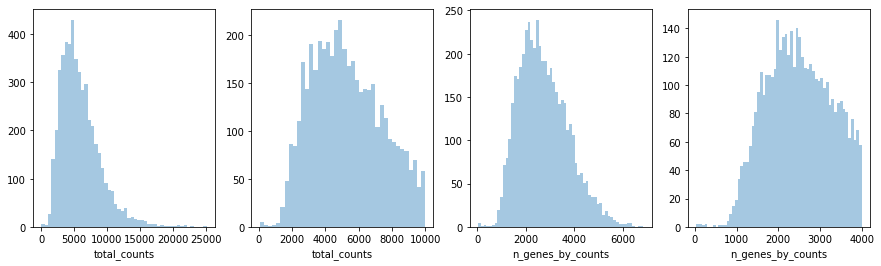

In [28]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [65]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]
sc.pp.filter_genes(adata, min_cells=10)

/opt/conda/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_counts'] = number


### 2.2 Normalization

In [32]:
# Normalize the adata 
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

### 2.3 Selecting highly varaible genes

In [ ]:
sc.pp.highly_variable_genes(adata, n_top_genes=1000)

### 3.1. Principal Component Analysis (PCA)

In [34]:
sc.pp.pca(adata)


### 4.1. Clustering

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

### 4.2. Visualization using Uniform Manifold Approximation and Projection (UMAP) and in spatial structure 

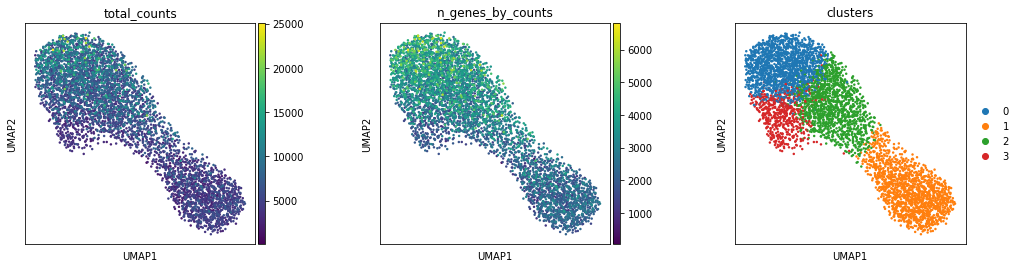

In [38]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

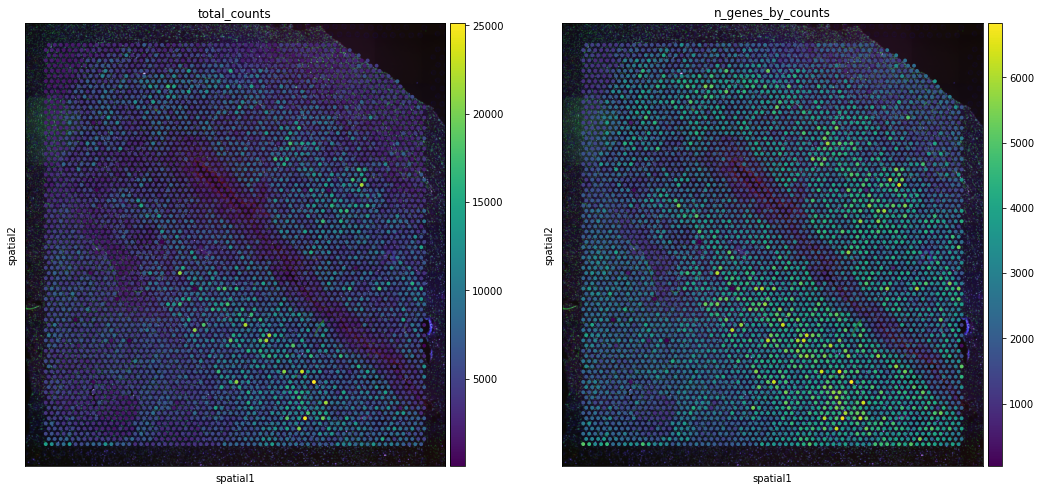

In [46]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

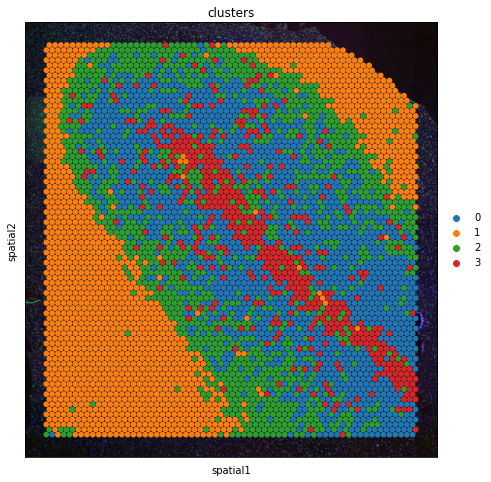

In [47]:
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)

### 4.3. Differential Expression Analysis

In [ ]:
# Compute marker genes for cluster 0 and plot a heatmap with expression levels of its top 10 marker genes across clusters.
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")

### 4.4. Marker Identification 

categories: 0, 1, 2, etc.
var_group_labels: 0


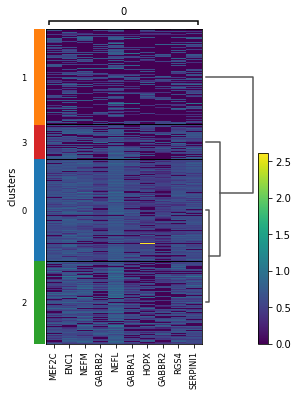

In [40]:
sc.pl.rank_genes_groups_heatmap(adata, groups="0", n_genes=10, groupby="clusters")

categories: 0, 1, 2, etc.
var_group_labels: 1


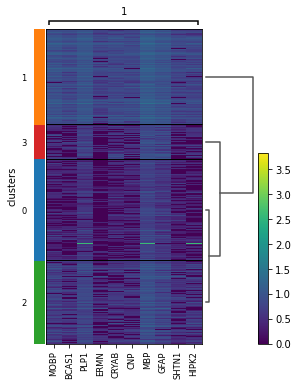

In [41]:
# Compute marker genes for cluster 1 and plot a heatmap with expression levels of its top 10 marker genes across clusters.
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="1", n_genes=10, groupby="clusters")

categories: 0, 1, 2, etc.
var_group_labels: 2


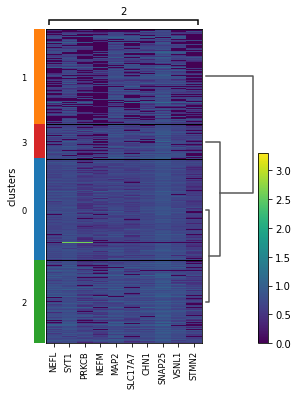

In [42]:
# Compute marker genes for cluster 2 and plot a heatmap with expression levels of its top 10 marker genes across clusters.
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="2", n_genes=10, groupby="clusters")

categories: 0, 1, 2, etc.
var_group_labels: 3


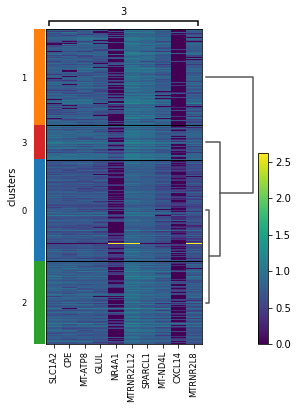

In [43]:
# Compute marker genes for cluster 3 and plot a heatmap with expression levels of its top 10 marker genes across clusters.
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="3", n_genes=10, groupby="clusters")

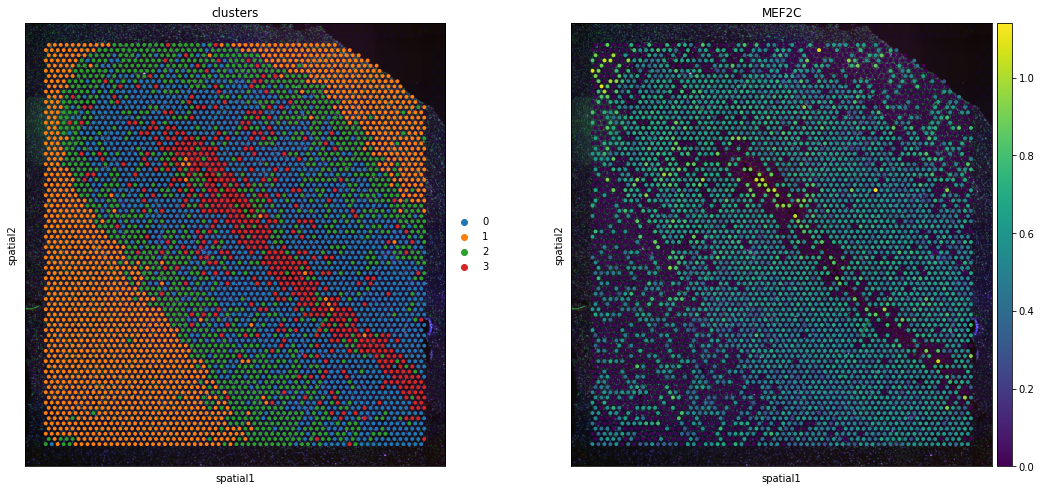

In [56]:
# Visualizing individual genes (For e.g. MEF2C gene) in the spatial structure. 
sc.pl.spatial(adata, img_key="hires", color=["clusters", "MEF2C"])

In [58]:
adata

AnnData object with n_obs × n_vars = 4910 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors', 'rank_genes_groups', 'dendrogram_clusters'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

### Conclusion 

* Marker genes/ highly regulated genes in Cluster 0 (MEF2C, ENC1, NEFM, GABRB2, NEFL, GABRB1, HOPX, GABBR2, RGS4, SERPINI1) are Neurons & Oligodendrocytes and Photoreceptor cells

* Marker genes in Cluster 1 (MOBP, BCAS1, PLP1, ERMN, CRYAB, CNP, MBP, GFAP, SHTN1, HPK2) are Oligodendrocytes


* Marker genes in Cluster 2 (NEFL, SYT1, PRKCB, NEFM, MAP2, SLC17A7, CHN1, SNAP25, VSNL1, STMN2) are Neurons & Oligodendrocytes

* Marker genes in Cluster 3 (SLC1A2, CPE, MT-ATP8, GLUL, NR4A1, SPARCL1, MT-ND4L, CXCL14, MTRNR2L8) are Cardiomyocytes


### Appendix

Pandas : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

Matplotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python

SCVI: Probabilistic models for single-cell omics data

Scanpy: Scanpy is an open sourcy library for analyzing single-cell gene expression data built jointly with anndata in python

Anndata: Python package for handling annotated data matrices in memory and on disk, positioned between pandas and xarray

